# Traceroute Sampling (TS)

#### Matheus Victal Cerqueira, _Universidade de São Paulo_ , [_Instituto de Ciências Matemáticas e de Computação_](https://www.icmc.usp.br/). 


### References:
[1] Eric D Kolaczyk and Gábor Csárdi. _Statistical analysis of network data with R_, volume 65. Springer, 2014.

[2] Dall’Asta, Luca, et al. "Exploring networks with traceroute-like probes: Theory and simulations." _Theoretical Computer Science_ 355.1 (2006): 6-24.

## Traceroute probing mechanism and The Internet

What we know as _the internet_ is a gigantic complex system of computers networks and routers that uses specific protocols to comunicate between its components. It is a _network of networks_ composed by public, private, academic and government systems that are conected by means such as eletronic, optical and wireless linking technologies in a broad variety of ways.

It is ubiquitous in modern society, in a way most people can not picture how life would be without it, as it makes part of almost every aspect of their routine. But it is also extremely hard to map, as it is a decentralized built. So a compehensive complete map of this entirely human construct is extremely lacking, due to factors such as its self-organizing nature, the privacy and secutity concerns surrounding it and, well, its sheer enourmous size. What we colloquialy call "The Internet" is composed by many layers: we can think about its physical hardware structure, the traffic of _packets_, the nature of the information propagated, the logical network of information flow and its paths, and it goes on.

The _logical internet_, refers to the set of paths in which information (_packets_) is routed through the _physical internet_ (the wired, connected, physical hardware stuff). The logical links may be directed connections between routers or connections between groups of routers, agregated in some manner. It is important to note, however, that the logical internet does not represent the unused part of the physical internet, in other words, physical links and vertices that does not make part in the traffic pf packets in a given time are invisible in the logical map we are refering to. This means that mapping the logical and the physical aspects of this system require different methods and aproaches.

One approach to mapping, or in other words, sampling a portion of the logical internet, in order to infer about the topology of the hole system, is the probing technique _traceroute_.

The traceroute sampling method is based in a special packet informarion called TTL (Time To Live), which is represented by an integer and is decreased by one each time it passes trough a router. If the TTL of a packet reaches zero in a determined router, the packet is droped from the network. This prevents lost packets to wonder the internet network eternally. After droping the packet, the router can send a message to notify the sender, a message that includes the internet protocol (IP adress unique identifying adress) of the router. This is the mechanism that traceroute exploits. In a nutshell, traceroute will send a sequence of packets to a set destination with successivily greater TTLs, and will record the corresponding IPs from the routers each time a packets TTL reaches zero. Applying this method, traceroute can map a path, from source to target, that contains the logical links and nodes the packets visited and by probing in this manner from various sources to variuous destinations, the method is able to sample a subgraph of the network, obtained by merging the mapped paths, and infer, in some sense, the topological characteristics of it [1, chapter 3].

## Tracerouting in graphs, a simple analytical and algorithmical aproach.

Traceroute can be used as a sampling method in various types of graphs, and with a simple approach, it is even possible to investigate the probabilistic mechanisms involved. 

So lets consider an idealized version of the traceroute mechanic to investigate. Considering a graph of interest $G(V,E)$, a sample $S = \{s_1,s_1,s_3,\cdots,s_n\}$ of $n$ _sources_ is taken from the vertex set $V$. Then, another sample $T = \{t_1,t_2,t_3,\cdots,t_m\}$ of $m$ _targets_ is sampled from $V\setminus S$. Finally, a route is sampled between all pairs given by the tuple $(s_i,t_j)\in S\times T$ and all vertices and edges composing these paths are taken (including sources and targets) to construct the sampled graph $G^*(V^*, E^*)$.

Now, lets consider some more restrictions to this sampling plan. Lets say $S$ and $T$ are obtained by simple random sampling without replacement and lets assume that the paths sampled are the shortest paths (considering the weigths of edges) between sources and targets. Then, it is argued by [2] that vertex and edge inclusion probabilities ($\pi_i$ and $\pi_{\{i,j\}}$ respectively) behave according to the following equations
$$\pi_i\approx 1-(1-\rho_S-\rho_T)exp(-\rho_S\rho_T b_i)$$
$$\pi_{\{i,j\}} \approx 1-exp(-\rho_S\rho_T b_{i,j}) $$
where $b_i$ is the vertex betweenness centrality of the vertex $i$, $b_{i,j}$ is the edge betweenness centrality of the edge $\{i,j\}$, and $\rho_s = n/N_v$ and $\rho_t = m/N_v$ , with $(N_v=n(V))$, are the source and target sampling fractions respectively.

Although sampling fractions in a real network are not obtainable from the sampled graph itself (since we do not have the information $N_v$), the equations above give interesting insight in the behaviour of the traceroute sampling design [1, chapter 5].

To better understand the idea above, an algorithm can be made with the considerations of the simple plan design presented. To do so, we need some python modules. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import networkx as nx
import random as rd

The function will be denoted as _pure_traceroute_, and receives a graph of interest $G$, a number of sources $n$ and a number of targets $m$, and returns a sampled graph obtained with the ideas discussed.

In [77]:
def pure_traceroute(G, n, m):
    
    V = list(G.nodes)
    sources = rd.sample(V, n) # simple random sampling without replacement from V of n nodes to act as sources
    S_V = [item for item in V if item not in sources] # S\V
    targets = rd.sample(S_V, m) # simple random sampling without replacement from V\S of m nodes to act as tragets
    print("\nSource nodes:",sources,"\nTarget nodes:",targets)
    
    edgelist = [] # edgelist to save the sampled edges, in order to obtein the sampled graph
    
    for s in sources:
        for t in targets:
            if nx.has_path(G,s,t): # verifies if a path exists between source and target
                path = nx.shortest_path(G,s,t)
            
            for i in range(len(path)-1): # loop to include the path in the sampled graph, node by node
                edgelist.append((path[i],path[i+1])) # oncludes each edge in the path
            
    sampled_graph = nx.Graph(edgelist) 
    
    return sampled_graph

Now, lets use the function _pure_traceroute_ to obtain samples form a random generated graph. To visualize such samples, we will use the following function.

In [3]:
def visualize(G, sample = 0):
    
    if sample == 0:
        pos=nx.spring_layout(G)
        plt.figure(figsize=(15,9))
        nx.draw_networkx(G, node_size=40, with_labels = False ,font_size=16, pos=pos,node_color='royalblue',edge_color ='k') 
        plt.show(True)
        
    else:
        pos=nx.spring_layout(G)
        plt.figure(figsize=(15,9))
        nx.draw_networkx(G, node_size=75, with_labels = False ,font_size=16, 
                         pos=pos,node_color='royalblue',edge_color ='royalblue') 
        nx.draw_networkx(sample, node_size=150, with_labels = False ,font_size=16, 
                         pos=pos,node_color='k',edge_color ='k',width = 2)
        plt.show(True)
        
    return

Generating a [Watts Strogatz](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html) random graph.

In [79]:
G = nx.watts_strogatz_graph(n = 100, k = 4, p = 0.2)

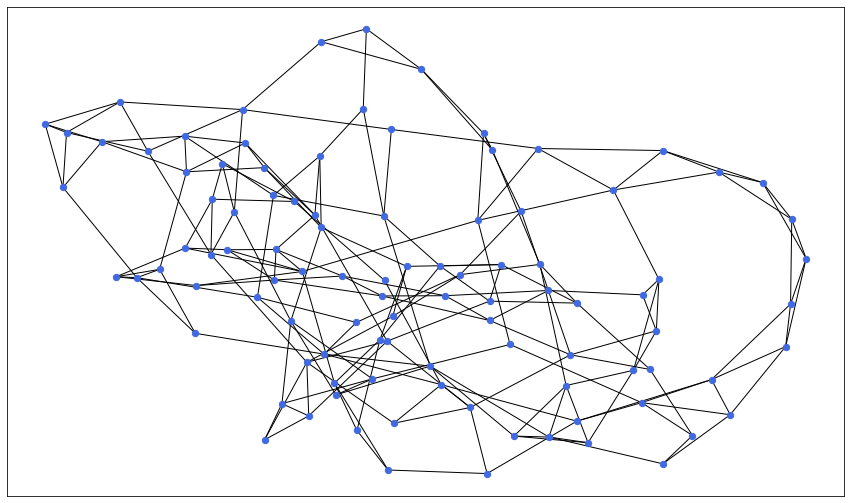

In [80]:
visualize(G)

Considering 1 source and 1 target, traceroute will sample one path.

In [81]:
sample = pure_traceroute(G,1,1)


Source nodes: [15] 
Target nodes: [53]


In [82]:
len(sample)

4

The original graph is represented in royal blue and the sampled graph in black.

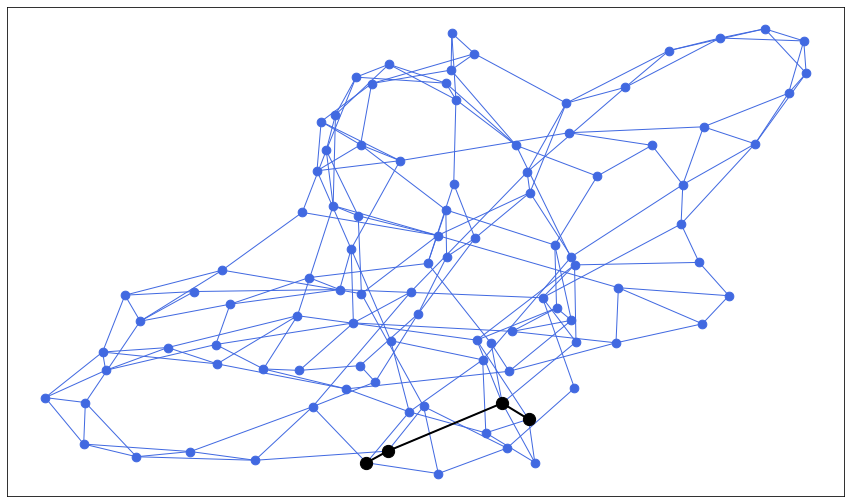

In [83]:
visualize(G, sample)

Now, considering 2 sources and 5 targets.

In [90]:
sample = pure_traceroute(G,2,5)


Source nodes: [94, 42] 
Target nodes: [95, 15, 77, 45, 71]


In [91]:
len(sample)

27

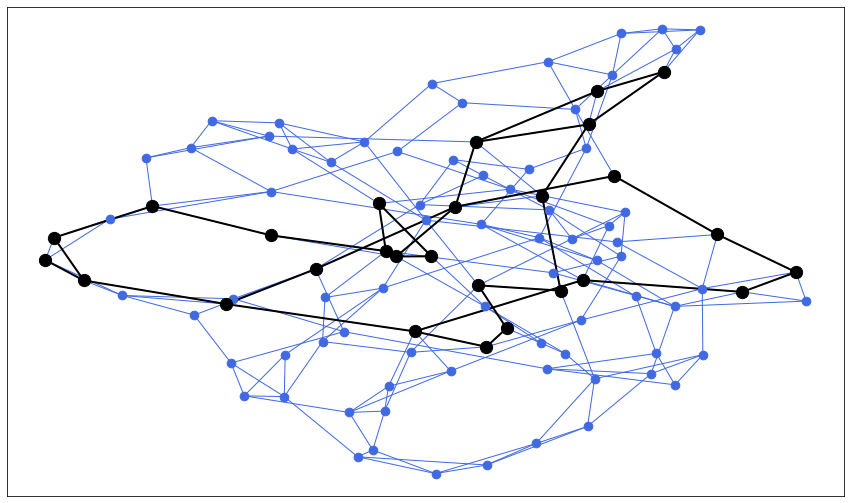

In [92]:
visualize(G, sample)

Although the visualization above gives us a perspective of how the traceroute probing works, real life networks can be gigantic with incredibly complex topology. We can see how it perform on a scale free network, considering the [Barabasi Albert model](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html#networkx.generators.random_graphs.barabasi_albert_graph).

In [93]:
G = nx.barabasi_albert_graph(800, 2, seed = 2112)

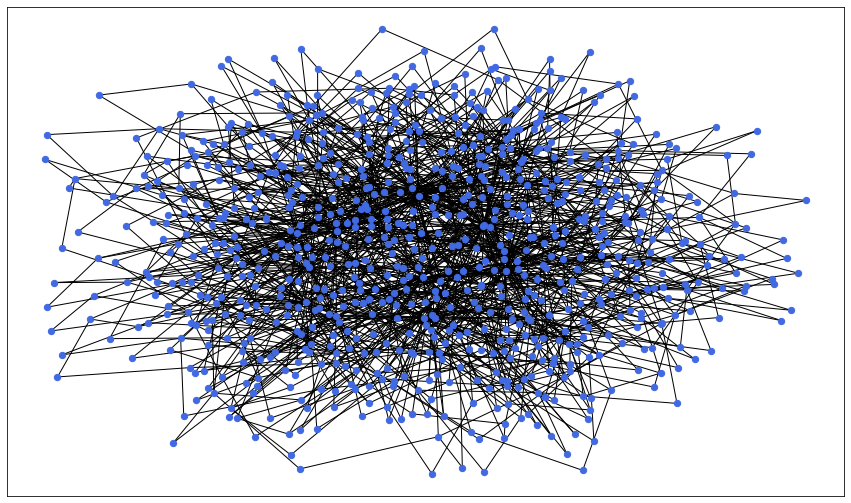

In [94]:
visualize(G)

Testing with different values for $n$ and $m$.


Source nodes: [633] 
Target nodes: [451]
5


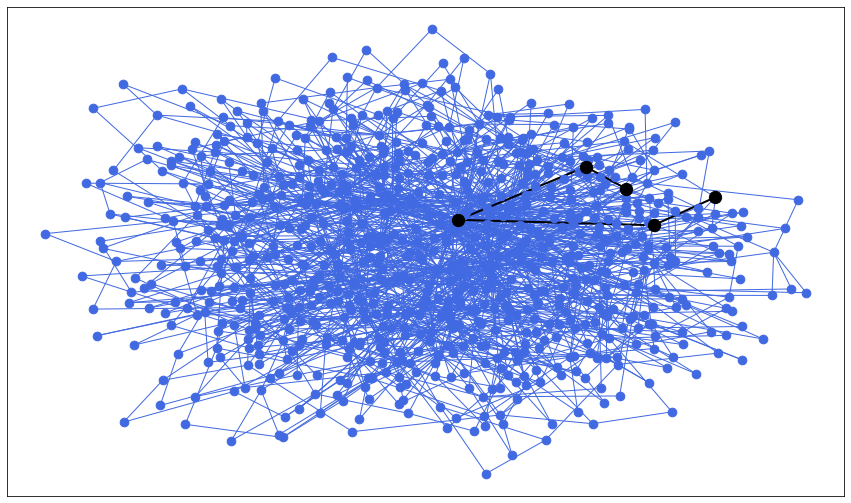

In [95]:
sample = pure_traceroute(G,1,1)
print(len(sample))
visualize(G,sample)


Source nodes: [304, 141] 
Target nodes: [268, 333, 391, 429, 459]
23


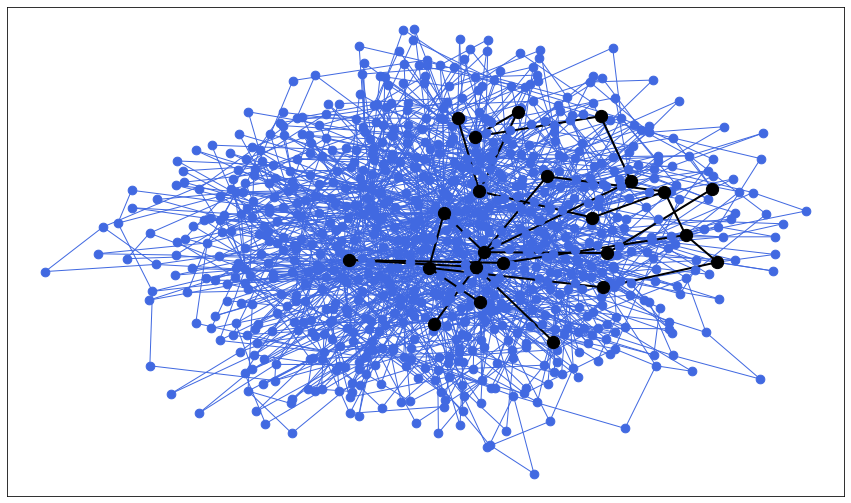

In [96]:
sample = pure_traceroute(G,2,5)
print(len(sample))
visualize(G,sample)


Source nodes: [285, 48, 640, 175, 750, 528, 571, 319, 551, 278, 69, 153, 555, 64, 576] 
Target nodes: [486, 776, 726, 40, 780, 49, 762, 51, 623, 793, 335, 442, 362, 231, 312, 446, 733, 637, 531, 580]
140


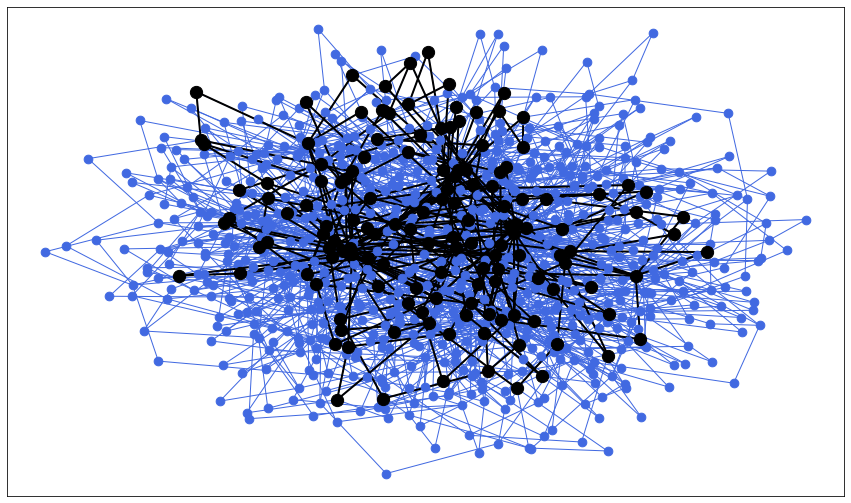

In [97]:
sample = pure_traceroute(G,15,20)
print(len(sample))
visualize(G,sample)

As expected, it starts to get very difficult to understant the graph and sample behavior with this visualization method when there are many nodes and edges on the original graph. 

## Proposed algorithm for size controlled connected samples

When comparing diferent graph sampling techniques, it is interesting that the node size of the sampled graph $n(V^*)$ is controllable, in other words, it is desirable that $Var[n(V^*)]=0$ and that $n(V^*)$ is a given, previously chosen, number. The function _pure_traceroute_ does not have this feature, as it is only possible to control the number of targets and sources. It is also interesting to note, with the function _pure_traceroute_, that's assured the sample is connected, another important factor to obtain certain metrics (think for a minute, draw some graphs). 

In [102]:
G = nx.barabasi_albert_graph(20000, 2)

In [106]:
sample = pure_traceroute(G,2,2)


Source nodes: [4004, 18074] 
Target nodes: [14742, 5554]


In [107]:
len(sample)

16

In [108]:
nx.is_connected(sample)

True

Since we can not control the node size with _pure_traceroute_, lets make a new function that can, defined as _traceroute_ in this notebook. The concept of this sampling plan is based on the traceroude probing method, but the design is different, in a way it gets easier to control $n(V^*)$. The function will only receive the graph of interest $G$ and the desirable sample sizze $n$. In each iteration, it will sample two nodes from $G$ using simple random sampling without replacement. The first node sampled will act as a source, and the second, as a target. The shortest path between source and target is sampled, node by node, and the process starts again, until the sample size $n$ is reached. If $n$ is achieved in the middle of a traceroute path finding, the loop is broken and the incomplete route is sampled.

Unfortunetly, this approach leads to a few exception cases in the sample that need to be countered. The first one is that it is not guaranteed that the sampled graph will be connected. For example, if four different nodes are selected to act as two nodes and two sources, it is not guaranteed that the two routes sampled between them will be connected. We could try to solve this by picking the largest component as our sample, but by doing this, we lose control over $n(V^*)$ , which was the objective since the beginning. 

To tackle this situation, the algorithm _traceroute_, here implemented, proceeds in the following way: it starts the sampling process as described previously in this section until the number of sampled nodes is $n$. Then, it is verified if the sampled graph is connected. If it is connected, the function returns it, if not, the largest component will be sampled and a second phase will begin. In this phase, in each iteration, two nodes are sampled: one from the largest component and the other from the remaining nodes of $G$. Then, the shortest path between them is sampled. The process is repeated until the sample reaches the node size $n$. The resulting sampled graph $G^*$ is connected and $n(G^*) = n$, resulting in the desirable characteristics for the sample. Bellow, the algorithm is presented in detail.

In [4]:
def traceroute(G,n): # is the graph of interest and n is the sample size
    
    edgelist = [] # list to store the sampled edges
    count = 0 # counter
    aux = 0 # this auxiliar variable will store the last node to be added in the graph in case the last loop results in a 
    # sample of size n+1
    
    # Principal loop:
    while count < n:
        sample_st = rd.sample(G.nodes,2) # uniformily choses 2 nodes without replacement to act as source and target
        source = sample_st[0]
        target = sample_st[1]
        
        if nx.has_path(G,source,target): # verifies if a path exists between source and target
            path = nx.shortest_path(G, source, target)
            
            for i in range(len(path)-1): # loop to include in the graph the path, node by node
                
                edgelist.append((path[i],path[i+1])) # here 3 things can happen: 0 new nodes are included, 1 new node is 
                # included or 2 new nodes are included, thus, the sample size n can only be passed by 1 in any given case
                
                count = len(nx.Graph(edgelist)) # sample size verification
                if count >= n: # breaks the for loop if the sample size is achieved or passed by 1 (only possible options)
                    aux = path[i+1] # auxiliar variable stores the last node included
                    break
    
    sampled_graph = nx.Graph(edgelist)
    
    if len(sampled_graph)>n: # removes the last added node if sample size is n+1, resulting in a sample size of n
        sampled_graph.remove_node(aux)
        
    # getting the largest connected component of the graph in case the graph obtained is not connected
    if nx.is_connected(sampled_graph) == False:
        largest_cc = max(nx.connected_components(sampled_graph), key=len)
        S = sampled_graph.subgraph(largest_cc).copy() #largest component of graph does not have the desired len
        count = len(S) # the counter assumes the size of S, there are left n - n(S) nodes to sample.
        
        G_nodes = list(G.nodes)
        S_nodes = list(S.nodes)
        
        notin_S_nodes = [item for item in G_nodes if item not in S_nodes] # G nodes that are not in S
        
        while count < n:
            source = rd.sample(S_nodes,1)[0] # sampled node from S to act as source
            target = rd.sample(notin_S_nodes,1)[0] # sampled node from V\S to act as source
            
            if nx.has_path(G,source,target): # verifies if a path exists between source and target
                path = nx.shortest_path(G, source, target)
            
                for i in range(len(path)-1): # loop to include in the graph the path, node by node
                    S.add_edge(path[i],path[i+1]) 
                    count = len(S)
                    if count >= n: 
                        break
    
        sampled_graph = S
    
    return sampled_graph

Now, lets test the _traceroute_ function in some random graphs, starting with a Watts Strogatz random graph

In [5]:
G = nx.watts_strogatz_graph(n = 100, k = 4, p = 0.2)

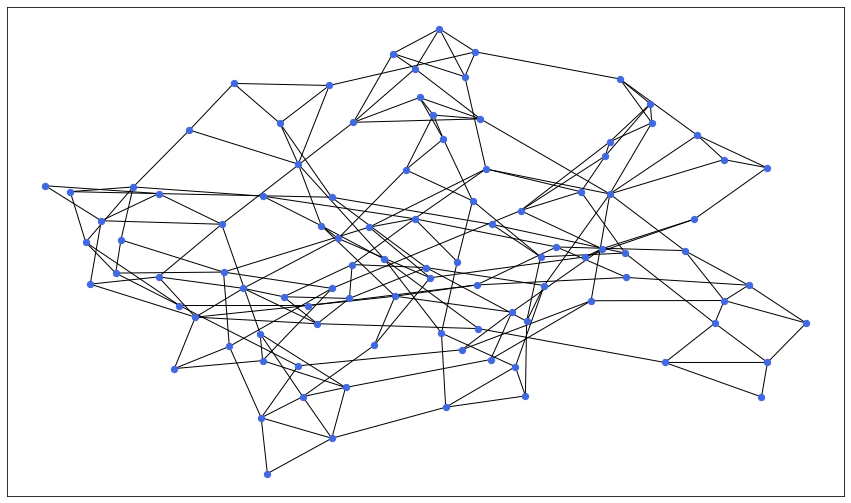

In [6]:
visualize(G)

In [7]:
sample = traceroute(G, 50)

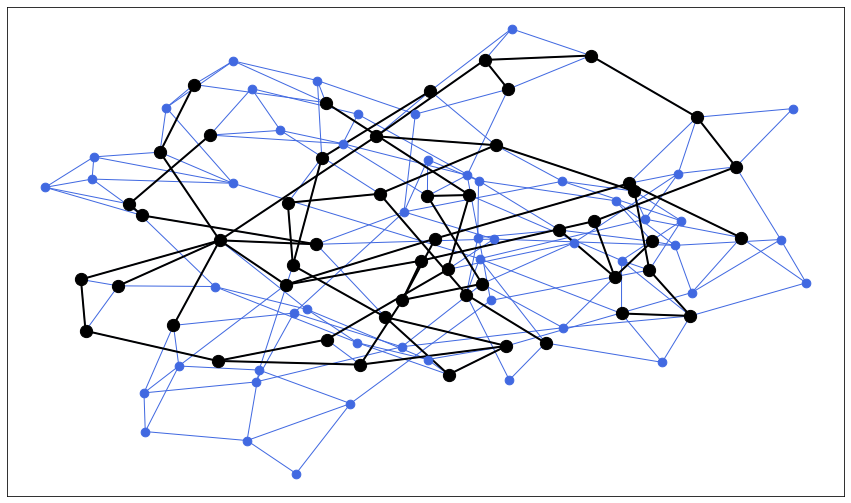

In [8]:
visualize(G,sample)

In [9]:
nx.is_connected(sample)

True

In [10]:
len(sample)

50

Lets go with a Barabási Albert Graph now.

In [13]:
G = nx.barabasi_albert_graph(1500, 2, seed = 2112)

In [15]:
sample = traceroute(G,800)
len(sample)

800

In [16]:
nx.is_connected(sample)

True

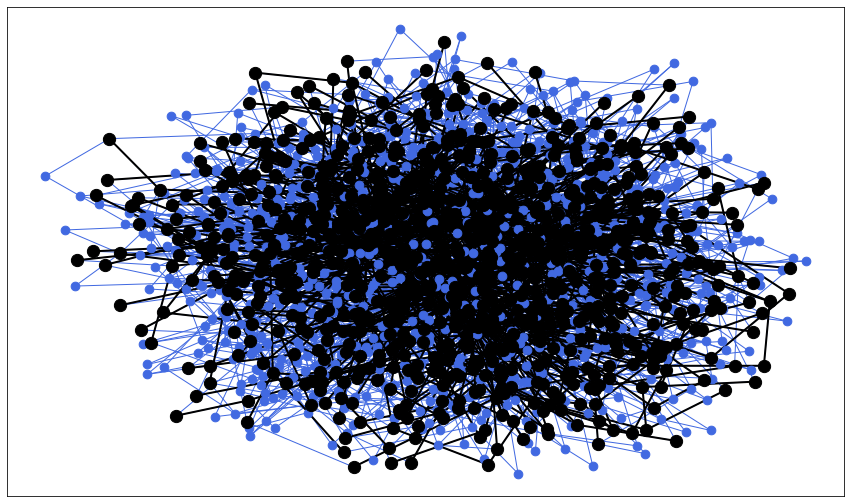

In [17]:
visualize(G, sample)

For a final test, it is interesting to make some simulations to verify if the exceptions are being well treated. 

In [18]:
G = nx.barabasi_albert_graph(200,2, seed = 2112)

In [21]:
count = 0
for i in range(8000): # 8000 samples of 100 nodes from a 200 nodes BA network
    sample = traceroute(G,100)
    
    if len(sample)!=100:
        print("Error 1: sample size is not the desirable")
        break
    if nx.is_connected(sample) == False:
        print("Error 2: the sample is not connected")
        break
    count = count + 1
    #print(count)
print(count)

8000


No errors were reported, so, most likely, the function is working in the intended way.